# Daniel Carrillo's Jupyter Notebook

Dependencies

In [1]:
# STANDARD
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# SKYLEARN
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DUMMY ENCODING
import warnings
warnings.simplefilter('ignore')



1. Section to load data

In [2]:
# dropped annual and quarterly
df = pd.read_csv('data/Combined_data_annual only.csv')
df.head()

,Date,CS_Ann,CD_Ann,Enrgy_Ann,Fncl_Ann,HlthC_Ann,Indstrl_Ann,Mtrls_Ann,Tech_Ann,Util_Ann,Unempl,Jobs_Non-Farm (000s),Hrly_Wages,CPI_urban,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice
0,12/1/98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044,127596,NaN,164.4,NaN,91.0,102.7,166.5
1,1/1/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043,127702,NaN,164.7,NaN,91.3,103.0,165.0
2,2/1/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044,128120,NaN,164.7,NaN,91.2,103.3,164.5
3,3/1/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042,128227,NaN,164.8,NaN,91.5,103.7,164.6
4,4/1/99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043,128597,NaN,165.9,NaN,92.4,103.9,171.3


3. Data pre-processing (convert to binary using Dummy Encoding)

In [3]:

# X = df[["column1", "column2", "column3"]]
# y = df["weight"].values.reshape(-1, 1)
# print(X.shape, y.shape)

# data = X.copy()

# data_binary_encoded = pd.get_dummies(data)
# data_binary_encoded.head()

4. Scale and normalize

In [4]:
# X = pd.get_dummies(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_train.head()


# // STANDARD SCALER
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

5. Linear or non-linear regression models here (testing/training and predictions).
    A simple linear model could be used for stock price predictions.

In [5]:
df = pd.read_csv('data/Combined_data_annual only.csv')
df.head()
df.fillna(0,inplace=True)

In [6]:
df.corr()

,CS_Ann,CD_Ann,Enrgy_Ann,Fncl_Ann,HlthC_Ann,Indstrl_Ann,Mtrls_Ann,Tech_Ann,Util_Ann,Unempl,Jobs_Non-Farm (000s),Hrly_Wages,CPI_urban,PPI_Commodity,Imp_Exp _Indx,haircut_price,cardboard_pice
CS_Ann,1.000000,0.659549,0.411542,0.644487,0.583553,0.717159,0.591338,0.390890,0.765059,0.074246,0.180700,0.319347,0.315036,0.413091,0.446037,0.272889,0.284667
CD_Ann,0.659549,1.000000,0.366931,0.804524,0.783767,0.820165,0.767245,0.629302,0.487266,0.155371,0.114801,0.235253,0.290424,0.506043,0.302796,0.264201,0.279715
Enrgy_Ann,0.411542,0.366931,1.000000,0.499463,0.318153,0.692222,0.646961,0.323261,0.590852,-0.152183,-0.176276,-0.246324,-0.237428,-0.188243,0.105527,-0.289665,-0.272111
Fncl_Ann,0.644487,0.804524,0.499463,1.000000,0.708499,0.864514,0.732606,0.506362,0.564709,-0.152707,0.131081,0.025582,0.096162,0.310300,0.089480,0.064644,0.116954
HlthC_Ann,0.583553,0.783767,0.318153,0.708499,1.000000,0.709243,0.617752,0.641282,0.435965,0.077501,0.196911,0.294874,0.358707,0.528668,0.432493,0.307432,0.363662
Indstrl_Ann,0.717159,0.820165,0.692222,0.864514,0.709243,1.000000,0.861080,0.679275,0.683617,-0.064010,0.116054,0.130039,0.154524,0.317714,0.282350,0.113703,0.154420
Mtrls_Ann,0.591338,0.767245,0.646961,0.732606,0.617752,0.861080,1.000000,0.557609,0.565735,-0.026700,0.035183,0.055678,0.071278,0.160072,0.175712,0.043908,0.035163
Tech_Ann,0.390890,0.629302,0.323261,0.506362,0.641282,0.679275,0.557609,1.000000,0.442131,0.008653,0.283149,0.331008,0.364344,0.424066,0.336445,0.354235,0.348662
Util_Ann,0.765059,0.487266,0.590852,0.564709,0.435965,0.683617,0.565735,0.442131,1.000000,-0.226148,0.249370,0.095751,0.176761,0.202066,0.237507,0.146184,0.144240
Unempl,0.074246,0.155371,-0.152183,-0.152707,0.077501,-0.064010,-0.026700,0.008653,-0.226148,1.000000,-0.454871,0.267697,0.173136,0.242726,0.379372,0.172502,0.114413


In [7]:
# Assign the data to X and y
X = df[["CPI_urban"]]
y = df["haircut_price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(263, 1) (263, 1)


In [8]:
#  train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
#  model
model = LinearRegression()

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9854858607800694
Testing Score: 0.9856878361495239


Text(0.5, 1.0, 'Residual Plot')

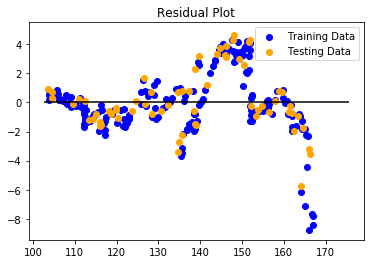

In [11]:
# plot model
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")